### [Linear Regression with Tensorflow 2](https://towardsdatascience.com/linear-regression-from-scratch-with-tensorflow-2-part-1-3e2443804df0)

In [831]:
# Import LIBs
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.3.0'

In [832]:
# Decalre inputs & labels
x_trains = [0.1, 1, 2, 3, 4, 5]
y_trains = [1.2, 3, 5, 7.5, 8.5, 12]

# for plot
global logs
logs = np.array([[], [], []]) # costs, weight, bias

In [833]:
# Declare W & b and set inital random values
W = tf.Variable(tf.random.normal([1])) # weight
b = tf.Variable(tf.random.normal([1])) # bias

In [834]:
# Hypothesis: Linear regression H(x) = Wx + b
def H(x):
  return W * x + b

In [835]:
# Cost(loss) function: Mean Square Error  Sum( ( H(x) - y )^2 ) / m
def mse(predicted, real):
  return tf.reduce_mean(tf.square(predicted - real))

In [836]:
# Optimizer: Gradient descent W = W - a(dy / dW), b = b - a(dy / db)
def gd(x, y, learning_rate):
  # get gradient
  with tf.GradientTape(persistent=True) as g:
    loss = mse(H(x), y)

  dy_dw = g.gradient(loss, W)
  dy_db = g.gradient(loss, b)
 
  W.assign_sub(learning_rate * dy_dw)
  b.assign_sub(learning_rate * dy_db)

  # for plot
  global logs
  logs = np.append(logs, np.array([[loss.numpy()], W.numpy(), b.numpy()]), axis=1)
  #print('cost:{}, W:{}, b:{}'.format(loss.numpy(), W.numpy()[0], b.numpy()[0]))

In [837]:
# training function
def train(x, y, learning_rate=0.01, epoch=200):
  for i in range(epoch):
    gd(x, y, learning_rate)

In [838]:
# run
train(x_trains, y_trains, 0.01, 200)
print('Model H(x) = {}x + {}'.format(W.numpy()[0], b.numpy()[0])) # W=2, b=0

Model H(x) = 1.9944343566894531x + 1.3043626546859741


In [839]:
# Predict when input = 7
W * 7 + b

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([15.265403], dtype=float32)>

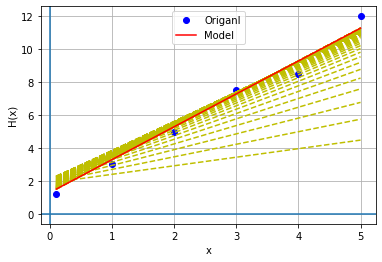

In [840]:
# orignal data
plt.plot(x_trains, y_trains, 'bo', label='Origanl')
# trained data
for i in range(len(logs[1])-1):
  plt.plot(x_trains, np.array(logs[1][i]) * x_trains + np.array(logs[2][i]), 'y--')
# final model
plt.plot(x_trains, W * x_trains + b, 'r-', label='Model')
plt.legend()
# draw
plt.xlabel('x')
plt.ylabel('H(x)')
plt.axhline(y=0)
plt.axvline(x=0)
plt.grid(True)
plt.show()

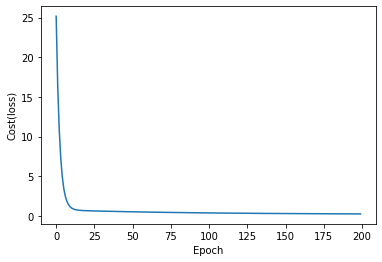

In [841]:
# cost logs
plt.plot(range(len(logs[0])), logs[0])
plt.xlabel('Epoch')
plt.ylabel('Cost(loss)')
plt.show()